# Sales Channel Frequency Data

This notebook contains some data exploration of the sales channel.
Specifically, this notebook contains how frequent different sales channels are used compared to each other.
The main type of plotting used here are histograms.
(The notebook is still a work in progres)

In [1]:
# US-Sales-Project ~ 10/07/2023
# Nathaniel Yee ~ Channel Frequency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in sales data
us_sales_data = pd.read_csv("US_Regional_Sales_Data.csv")

us_sales_data.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


Please note that the following data in this notebook have not removed any data columns, so redundant data such as OrderNumber are present.

### Find the amount of customers based on ID

In [2]:

# print the total amount of customers
print("Total distcint values: " + str(len(us_sales_data['_CustomerID'].unique())))

# print the individual customer IDs
print("CustomerID: " + str(us_sales_data['_CustomerID'].unique()) + "\n")

Total distcint values: 50
CustomerID: [15 20 16 48 49 21 14  9 33 36 17 32 11 10 30  5 23 46 40 19 22 29 35 42
  2 28 34 26 24 18  3 13  4 25  8 47  6 38  1  7 27 44 12 50 43 37 41 31
 45 39]



### Added profit (based on price - cost - discount)

In [3]:
# A temporary dataframe which deals soley with prices
temp = us_sales_data[['Unit Price', 'Unit Cost', 'Discount Applied']]

# remove the commas so that price calculation is possible
temp = temp.replace(',','', regex=True)

# determine the total profit of each row
temp['Profit'] = temp['Unit Price'].astype(float) - temp['Unit Cost'].astype(float) - temp['Discount Applied']

# append the profit to the sales data with a new column 'Profit'
us_sales_data['Profit'] = temp['Profit']

# print data to ensure it is working
us_sales_data

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Profit
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10",961.845
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60",590.865
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50",994.230
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90",860.135
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40",346.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234.5,112.485
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56","3,202.60",1280.990
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76","3,825.70",1032.740
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,"1,072.00",267.900


### Frequency of sales across the sales channels

<Axes: >

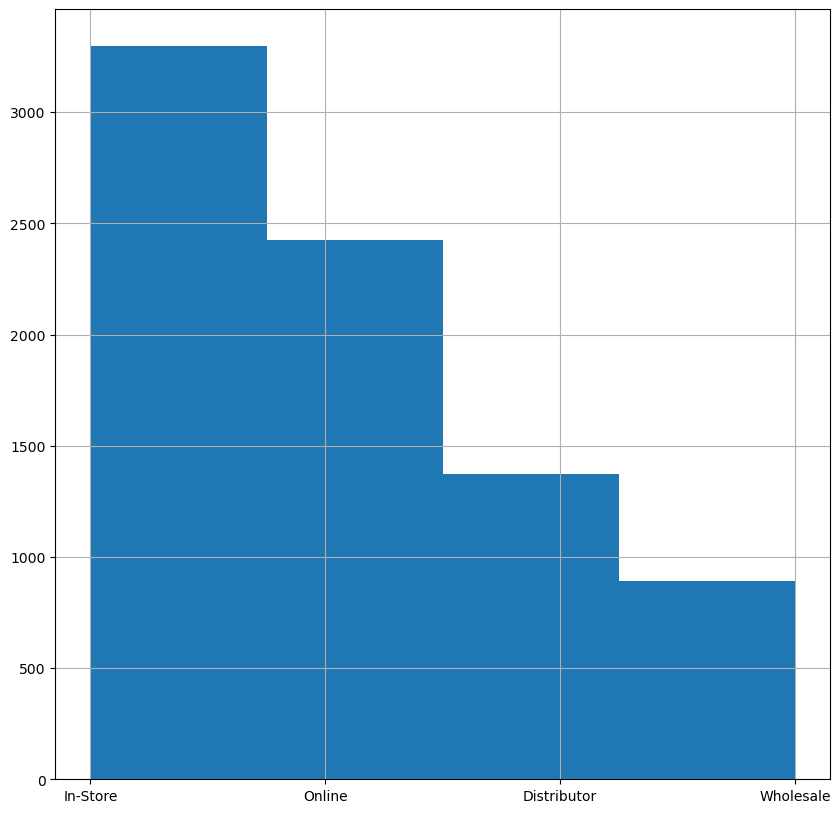

In [4]:
# split the data into subsets of each sales channel
instore_data = us_sales_data[us_sales_data['Sales Channel'] == 'In-Store']
online_data = us_sales_data[us_sales_data['Sales Channel'] == 'Online']
distributor_data = us_sales_data[us_sales_data['Sales Channel'] == 'Distributor']
wholesale_data = us_sales_data[us_sales_data['Sales Channel'] == 'Wholesale']

# visualize the frequency of each channel's usage (raw data)
us_sales_data['Sales Channel'].hist(bins=4, figsize=(10, 10))

As we can see from the raw data, in-store seems to be used most frequently for purchasing products.
Online is used less frequently than in-store. By Distributor is less than online, and by Wholesale is even less.

However, these frequencies do not take into account the following:
    Which customers use which channel for frequently and when
    Which sales team is responsible for this sale
    The quality of shipping dates
    Total Profit from each purchase
    etc.

These will need to be taken into account as well as correlating data to see if certain variables (such as sales team) have an impact on the sales.

### Customer Frequency across the four channes (some data may be hidden)

<Axes: >

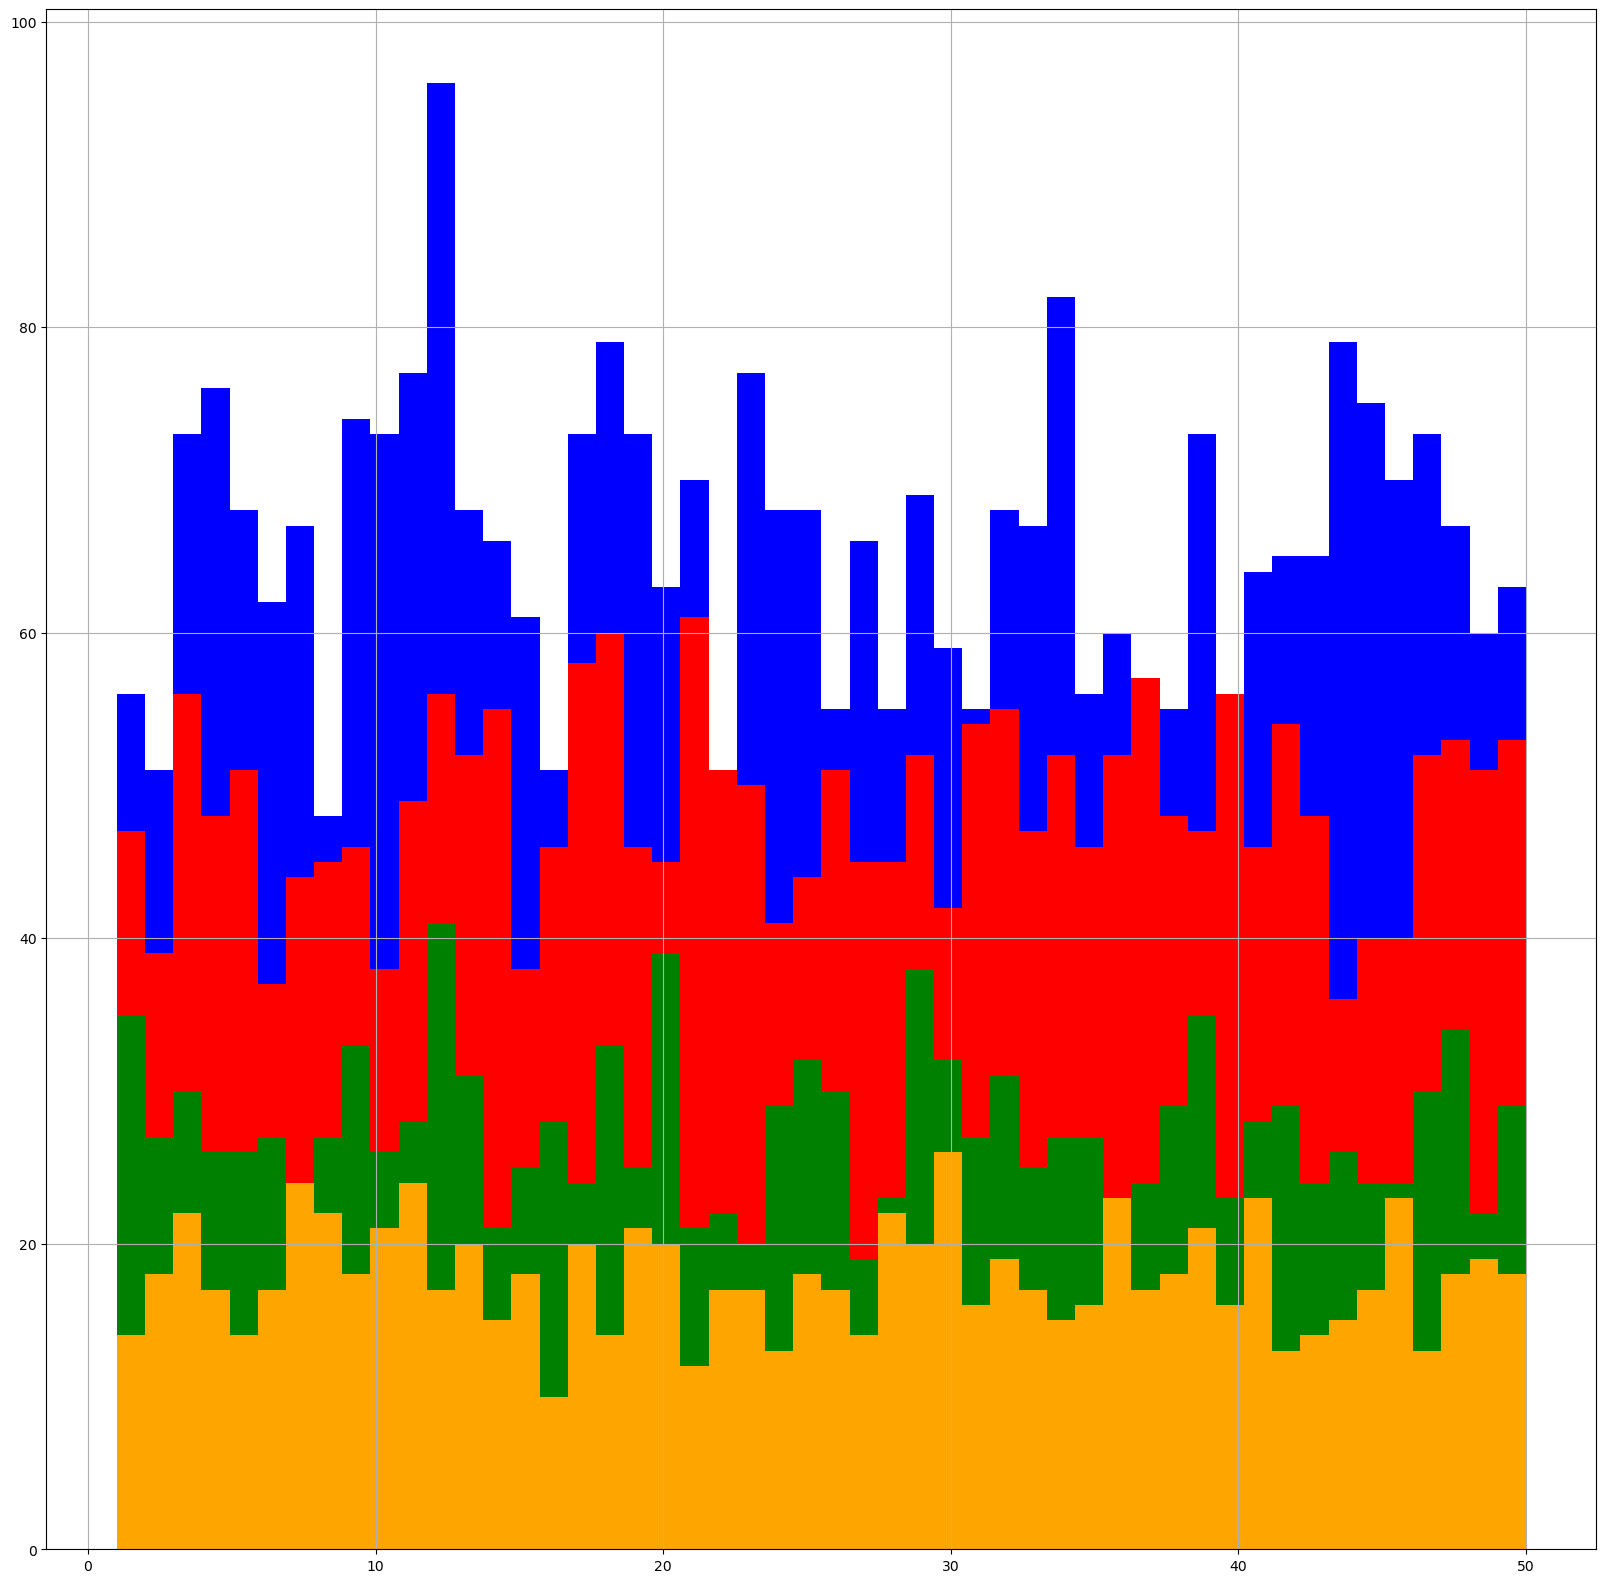

In [5]:
# Customor Frequency Chart

# variables to manually change plot size
x_size = 20
y_size = 20

# plot every customerID with each sales channel
instore_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='blue')
online_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='red')
distributor_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='green')
wholesale_data['_CustomerID'].hist(bins=50, figsize=(x_size, y_size), color='orange')

# blue   = in-store
# red    = online
# green  = distributor
# orange = wholewale

In this graph
x = customerID
y = frequency

As we can see here, most customers seem consistent their frequency with each channel.
However, some data may potentially be covered. (For instance, if a customer were to use online more than in-store, the red data would cover the blue in this graph.)

While more cross-referencing is necessary, we can safely assume that overall the frequency of each customer is highly correlated with the frequency of channel usage.

Profit can be used to determine the net gain for each purchase.

This is all I have as of right now. Feel free to use whatever code or data here for comparison if you need.

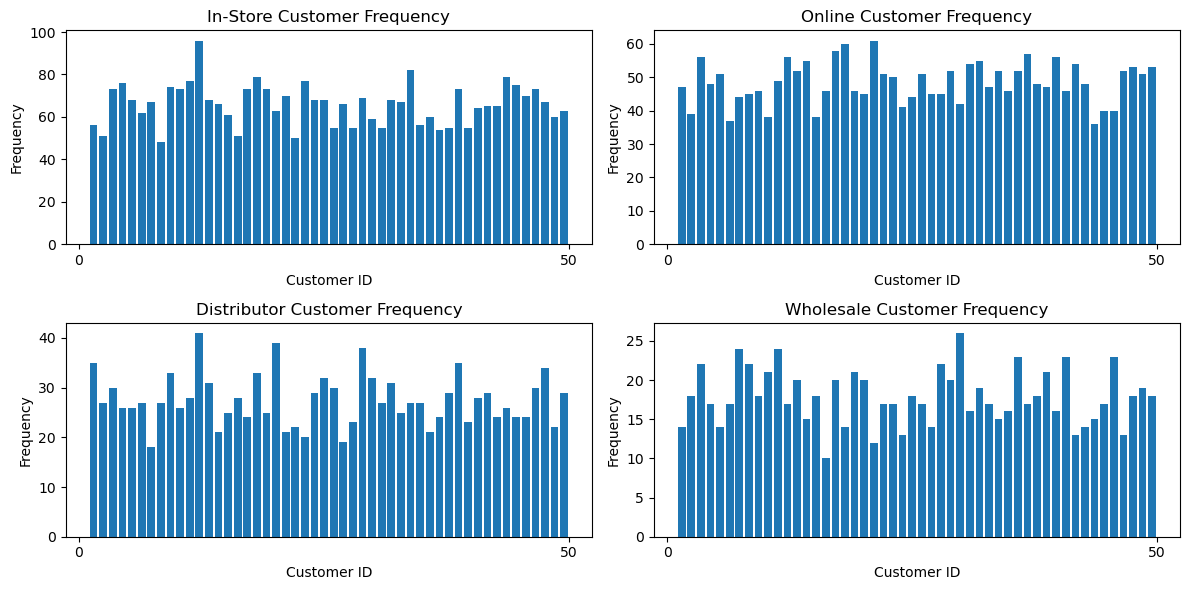

In [6]:
# Show the four different sales channel frequencies

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))


axes[0][0].hist(instore_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[0][0].set_title('In-Store Customer Frequency')
axes[0][0].set_xticks([0, 50])
#axes[0].set_xticklabels(['0', '1'])
axes[0][0].set_xlabel('Customer ID')
axes[0][0].set_ylabel('Frequency')


axes[0][1].hist(online_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[0][1].set_title('Online Customer Frequency')
axes[0][1].set_xticks([0, 50])
#axes[1].set_xticklabels(['0', '1'])
axes[0][1].set_xlabel('Customer ID')
axes[0][1].set_ylabel('Frequency')

axes[1][0].hist(distributor_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[1][0].set_title('Distributor Customer Frequency')
axes[1][0].set_xticks([0, 50])
#axes[1].set_xticklabels(['0', '1'])
axes[1][0].set_xlabel('Customer ID')
axes[1][0].set_ylabel('Frequency')

axes[1][1].hist(wholesale_data['_CustomerID'], bins=50, align='mid', rwidth=0.8)
axes[1][1].set_title('Wholesale Customer Frequency')
axes[1][1].set_xticks([0, 50])
#axes[1].set_xticklabels(['0', '1'])
axes[1][1].set_xlabel('Customer ID')
axes[1][1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Once again, we can confirm the information above about which channels are used more frequently.
It is still possible that some customers use certain channels more frequently.

In [8]:
### Profit Data

Text(0.5, 1.0, 'Wholesale Profits per Customer')

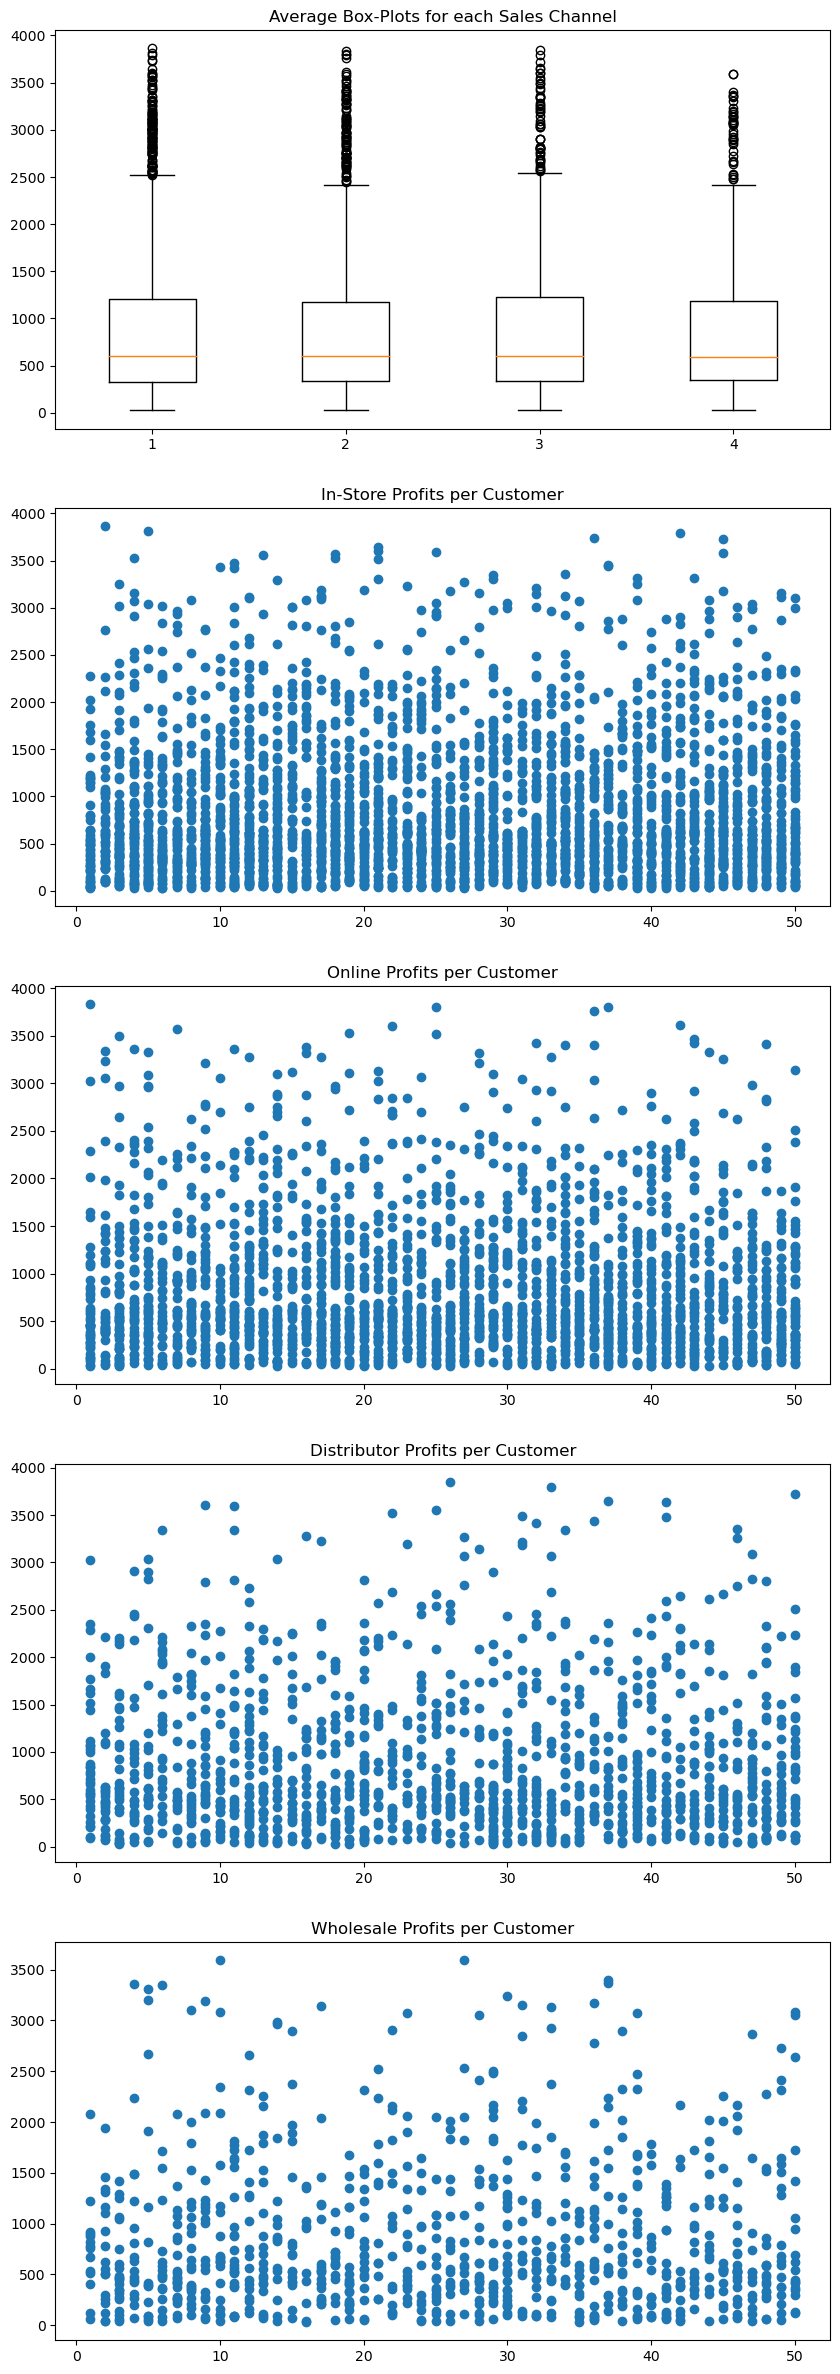

In [9]:
figs, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))


axes[0].boxplot([instore_data['Profit'], online_data['Profit'], distributor_data['Profit'], wholesale_data['Profit']])
axes[0].set_title('Average Box-Plots for each Sales Channel')
axes[1].scatter(instore_data['_CustomerID'], instore_data['Profit'])
axes[1].set_title('In-Store Profits per Customer')

axes[2].scatter(online_data['_CustomerID'], online_data['Profit'])
axes[2].set_title('Online Profits per Customer')
axes[3].scatter(distributor_data['_CustomerID'], distributor_data['Profit'])
axes[3].set_title('Distributor Profits per Customer')
axes[4].scatter(wholesale_data['_CustomerID'], wholesale_data['Profit'])
axes[4].set_title('Wholesale Profits per Customer')


In [10]:
# Basic Profit Data in numbers

print("Averages:")
print("\tIn-Store Average Profit: $%.2f" % instore_data['Profit'].mean())
print("\tOnline Average Profit: $%.2f" % online_data['Profit'].mean())
print("\tDistributor Average Profit: $%.2f" % distributor_data['Profit'].mean())
print("\tWholesale Average Profit: $%.2f" % wholesale_data['Profit'].mean())

print("\nHighest Profits:")
print("\tIn-Store Highest Profit: $%.2f" % instore_data['Profit'].max())
print("\tOnline Highest Profit: $%.2f" % online_data['Profit'].max())
print("\tDistributor Highest Profit: $%.2f" % distributor_data['Profit'].max())
print("\tWholesale Highest Profit: $%.2f" % wholesale_data['Profit'].max())

print("\nLowest Profits:")
print("\tIn-Store Lowest Profit: $%.2f" % instore_data['Profit'].min())
print("\tOnline Lowest Profit: $%.2f" % online_data['Profit'].min())
print("\tDistributor Lowest Profit: $%.2f" % distributor_data['Profit'].min())
print("\tWholesale Lowest Profit: $%.2f" % wholesale_data['Profit'].min())

Averages:
	In-Store Average Profit: $845.34
	Online Average Profit: $851.62
	Distributor Average Profit: $872.32
	Wholesale Average Profit: $850.91

Highest Profits:
	In-Store Highest Profit: $3862.82
	Online Highest Profit: $3830.41
	Distributor Highest Profit: $3846.84
	Wholesale Highest Profit: $3592.80

Lowest Profits:
	In-Store Lowest Profit: $25.05
	Online Lowest Profit: $24.82
	Distributor Lowest Profit: $24.92
	Wholesale Lowest Profit: $30.94


While in-store has the most customer frequency, it has the lowest average. However, this may be due to the density of lower profits.

The distributor average is the highest, likely due to a more scattered distribution.

It is also noted that Wholesale's profit has the lowest maximum, while having the highest minimum.


What we can conclude from the close averages is that all the sales channels have similar performances outside of frequency.